---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
data_df = pd.read_csv('Data/fraud_data.csv')
data_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [4]:
data_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [5]:
df = data_df.copy()
seg = df.iloc[:,-1]
float(seg[seg.values==1].count()/seg.count())

0.016410823768035772

In [6]:
data_df['Class'].value_counts(normalize = True)[1]

0.016410823768035772

In [7]:
def answer_one():
    
    # Your code here
    data_df = pd.read_csv('Data/fraud_data.csv')
    percentage_fraud = data_df['Class'].value_counts(normalize = True)[1]
    return percentage_fraud


In [8]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('Data/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
X_train.shape, y_train.shape

((16269, 29), (16269,))

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
y_preds = dummy_clf.predict(X_test)
# xuat du doan
dummy_clf.score(X_train,y_train)
recall_score(y_test,y_preds)

DummyClassifier(strategy='most_frequent')

0.9830352203577356

0.0

In [11]:
def answer_two():
    
    
    # Your code here
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train,y_train)
    y_preds = dummy_clf.predict(X_test)
    # xuat du doan
    accuracy = dummy_clf.score(X_train,y_train)
    recall = recall_score(y_test,y_preds)
    return (accuracy, recall)
answer_two()

(0.9830352203577356, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [12]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train,y_train)
y_preds = svm_clf.predict(X_test)
y_preds

SVC()

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
accuracy = svm_clf.score(X_train,y_train)
recall = recall_score(y_true = y_test, y_pred = y_preds)
precision = precision_score(y_true = y_test, y_pred = y_preds)
accuracy,recall,precision

(0.9897965455774786, 0.35, 0.9333333333333333)

In [14]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svm_clf = SVC()
    svm_clf.fit(X_train,y_train)
    y_preds = svm_clf.predict(X_test)
    accuracy = svm_clf.score(X_train,y_train)
    recall = recall_score(y_true = y_test, y_pred = y_preds)
    precision = precision_score(y_true = y_test, y_pred = y_preds)
    return (accuracy,recall,precision)
answer_three()

(0.9897965455774786, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [15]:
from sklearn.metrics import confusion_matrix
svm_clf = SVC(C = 1e9, gamma =1e-07).fit(X_train,y_train)
y_test_preds = svm_clf.decision_function(X_test)

In [16]:
y_preds = y_test_preds > -220
confusion_matrix(y_test,y_preds)

array([[5320,   24],
       [  14,   66]])

In [17]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm_clf = SVC(C = 1e9, gamma =1e-07).fit(X_train,y_train)
    y_test_preds = svm_clf.decision_function(X_test)
    y_preds = y_test_preds > -220
    return confusion_matrix(y_test,y_preds)
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5
Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is 0.75?

Looking at the roc curve, what is the true positive rate when the false positive rate is 0.16?

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
logistic_clf = LogisticRegression().fit(X_train,y_train)
y_preds = logistic_clf.decision_function(X_test)
y_preds

/home/chibao/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-6.38279047, -7.13806197, -5.33965699, ..., -6.29442931,
       -8.45944749, -6.54810145])

(array([0.0147656 , 0.01458372, 0.01458641, ..., 1.        , 1.        ,
        1.        ]),
 array([1.    , 0.9875, 0.9875, ..., 0.025 , 0.0125, 0.    ]),
 array([-16.76888795, -16.68131529, -16.11414085, ...,  33.93557335,
         34.76037247,  36.85159682]))

<Figure size 432x288 with 0 Axes>

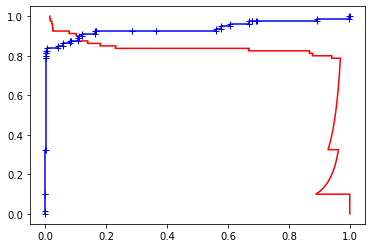

In [31]:
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test,y_preds)
precision, recall, thresholds
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_preds)
plt.figure()
plt.plot(precision,recall, color='red')
plt.plot(fpr_lr,tpr_lr, color='blue', marker='+')
plt.show()
    

In [20]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    logistic_clf = LogisticRegression().fit(X_train,y_train)
    y_preds = logistic_clf.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test,y_preds)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_preds)
    return (0.82,0.9)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.model_selection import GridSearchCV
grid_values={'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
logistic_clf = LogisticRegression()
model_logistic = GridSearchCV(estimator = logistic_clf, param_grid = grid_values, cv = 3)
model_logistic.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [23]:
model_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
model_logistic.cv_results_['mean_test_score'].reshape(5,2)

array([[       nan, 0.99618907],
       [       nan, 0.99606614],
       [       nan, 0.99569734],
       [       nan, 0.99563587],
       [       nan, 0.99557441]])

In [28]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    grid_values={'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    logistic_clf = LogisticRegression()
    model_logistic = GridSearchCV(estimator = logistic_clf, param_grid = grid_values, cv = 3)
    model_logistic.fit(X_train,y_train)
    return model_logistic.cv_results_['mean_test_score'].reshape(5,2)
answer_six()

array([[       nan, 0.99618907],
       [       nan, 0.99606614],
       [       nan, 0.99569734],
       [       nan, 0.99563587],
       [       nan, 0.99557441]])

<IPython.core.display.Javascript object>


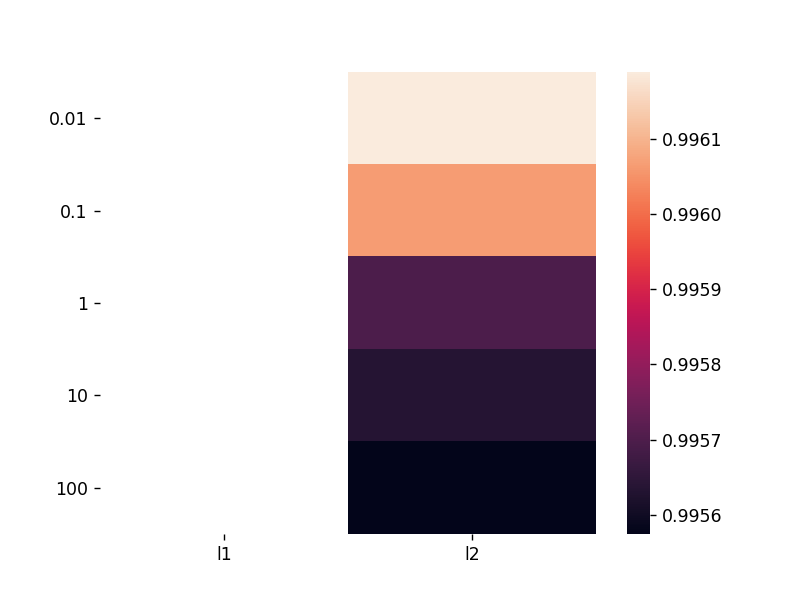

In [32]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())